# Introduction

In today's data-driven world, businesses face the challenge of not only acquiring vast amounts of data but also deriving meaningful insights from it. Customer segmentation is a powerful analytical technique that allows organizations to understand their customer base better, identify distinct customer groups, and tailor their strategies accordingly. This project focuses on customer segmentation using an extensive retail dataset, shedding light on how businesses can optimize their marketing efforts, enhance customer experiences, and boost overall profitability.
# Retail Dataset

The dataset under analysis is rich and comprehensive, containing valuable information about each customer's purchasing behavior. Key attributes include:

**a. Recency**: Measuring the time elapsed since a customer's last purchase.

**b. Frequency**: Quantifying the number of transactions made by each customer.

**c. Monetary**: Reflecting the total monetary value spent by each customer.

Additionally, the dataset includes information such as Customer ID, purchase dates, and other transaction-related details.



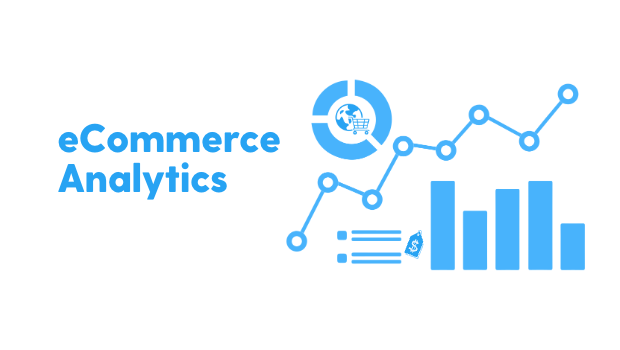

# Project Objectives

The primary objectives of this project are as follows:

1. Customer Segmentation: Utilize the principles of machine learning and clustering techniques to group customers into distinct segments based on their purchasing behavior.

2. RFM Analysis: Apply RFM (Recency, Frequency, Monetary) analysis to assign numerical values to each customer's behavior, facilitating the clustering process.

3. K-Means Clustering: Implement the K-Means clustering algorithm to categorize customers into clusters that exhibit similar purchasing patterns.

4. Business Insights: Explore the characteristics of each cluster to gain actionable insights, such as identifying high-value customer groups, targeting dormant customers for re-engagement, and customizing marketing strategies.

# Methodology

The project will begin with data preprocessing, including data cleaning and feature engineering. We will then perform RFM analysis to transform raw transactional data into valuable metrics. The K-Means clustering algorithm will be employed to segment customers into meaningful clusters. The choice of the optimal number of clusters will be guided by the Elbow Method, ensuring robust and interpretable results.

# Expected Outcomes

By the end of this project, we aim to create a clear and actionable customer segmentation strategy for our retail dataset. We anticipate identifying distinct customer groups with unique characteristics, allowing businesses to tailor their marketing, product offerings, and customer engagement strategies accordingly. Additionally, we will measure the effectiveness of the clustering solution using the Silhouette Score, providing a quantitative evaluation of the quality of the clusters.



In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
# os.chdir("new path")

Loading Dataset

In [ ]:
df=pd.read_csv("/content/E-com_Data.csv")

In [ ]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [ ]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [ ]:
df.describe()

,CustomerID,InvoieNo,Quantity,price per Unit,Price,Sold as set
count,404189.000000,537979.000000,537979.000000,537979.000000,537979.000000,0.0
mean,2181.909035,385017.572063,9.343339,378.339062,2161.414593,NaN
std,1252.681881,13426.052649,27.623322,440.048823,4538.487177,NaN
min,2.000000,361429.000000,-2003.000000,1.000000,-10152.000000,NaN
25%,1207.000000,372961.000000,1.000000,169.000000,451.000000,NaN
50%,2078.000000,385706.000000,3.000000,261.000000,1194.000000,NaN
75%,3291.000000,396873.000000,10.000000,456.000000,2232.000000,NaN
max,4372.000000,406651.000000,3186.000000,64973.000000,90400.000000,NaN


In [ ]:
df.isnull().sum()/len(df)*100

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

# Customer id is most important feature for our analysis so instead of droping a column we can go ahead and drop rows

In [ ]:
df.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [ ]:
df.duplicated().sum()

3145

# EDA -----Pandas Profiling,Dataprep,lux,dtale


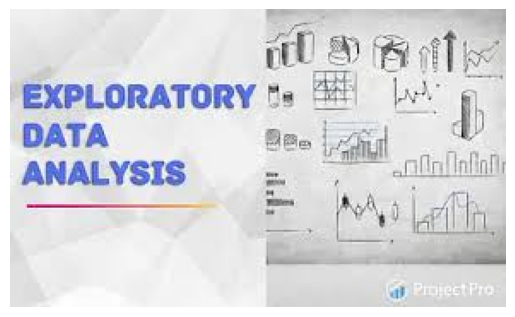

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# Replace 'your_image.jpg' with the actual filename
uploaded_image = Image.open('/content/1.jpg')

# Display the image
plt.imshow(uploaded_image)
plt.axis('off')
plt.show()


In [1]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 80.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=8868362827708e2b9dcf0e561d5e96352614bbda7b8ea612b8615cad7fef5c1e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
ERROR: Operation cancelled by user


In [ ]:
from pandas_profiling import ProfileReport

prof=ProfileReport(df)
prof.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
for i in df.columns:
  print("*****************************",i,
        "**********************************************")
  print()
  print(set(df[i].tolist()))
  print()

***************************** CustomerID **********************************************

{2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, nan, 127.0, nan, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [ ]:
df=df.drop(['Item Code','Quantity', 'Time', 'price per Unit', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],axis=1)

In [ ]:
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [ ]:
df.duplicated().sum()

6008

In [ ]:
df=df.drop_duplicates(ignore_index=True)

In [ ]:
df.shape

(535108, 4)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df=df.rename(columns={"InvoieNo":"InvoiceNo","Date of purchase":"Date"})
df.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [ ]:
df.isnull().sum()

CustomerID    132249
InvoiceNo          1
Date               1
Price              1
dtype: int64

In [ ]:
df=df.dropna(subset=["CustomerID"])

In [ ]:
df.isnull().sum()

CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64

# analyze the date part

In [ ]:
import datetime as dt

In [ ]:
df["Date"]=pd.to_datetime(df['Date'])

In [ ]:
df['Date'].describe()

count                  402859
unique                    381
top       2017-11-24 00:00:00
freq                     2507
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [ ]:
latest_date=dt.datetime(2017,12,20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

#RFM CONCEPT
## 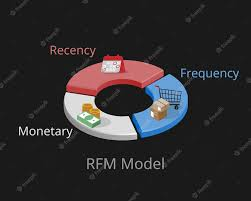

In [ ]:
RFMScore=df.groupby("CustomerID").agg({"Date": lambda x:(latest_date-x.max()).days,
                                      "InvoiceNo": lambda x:x.count(),
                                       "Price": lambda x : x.sum()})
RFMScore.rename(columns={"Date":"Recency","InvoiceNo":"Frequency","Price":"Monetary"},inplace=True)



In [ ]:
RFMScore.head()

,Recency,Frequency,Monetary
CustomerID,,,
2.0,4,181,550416.0
3.0,77,27,257404.0
4.0,20,72,176613.0
5.0,18,16,41976.0
6.0,9,84,151822.0


In [ ]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
...,...,...,...,...
4344,4368.0,17,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,12,13,24962.0
4347,4371.0,4,751,279720.0


In [ ]:
for i in RFMScore.columns:
  print("*****************************",i,
        "**********************************************")
  print()
  print(set(RFMScore[i].tolist()))
  print()

***************************** Recency **********************************************

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 587, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 526, 92, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 617, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 106, 119, 120, 121, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 155, 157, 161, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 185, 188, 190, 191, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 211, 212, 214, 216, 220, 226, 228, 230, 231, 232, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 246, 2

In [ ]:
RFMScore.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

In [ ]:
RFMScore.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

In [ ]:
RFMScore.Frequency.describe()

count    4349.000000
mean       92.632559
std       230.742279
min         1.000000
25%        17.000000
50%        42.000000
75%       101.000000
max      7919.000000
Name: Frequency, dtype: float64

In [ ]:
RFMScore.Monetary.describe()

count    4.349000e+03
mean     2.294939e+05
std      8.556685e+05
min     -5.037200e+04
25%      3.814000e+04
50%      8.363500e+04
75%      2.054440e+05
max      3.547209e+07
Name: Monetary, dtype: float64

In [ ]:
quantile =RFMScore.quantile(q=[0.25,0.50,0.75])
quantile =quantile.to_dict()

In [ ]:
quantile

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [ ]:
def recency_score(x,p,d):
  # x:means condition,p:percentile,d=data point
  if x <= d[p][0.25]:
    return 1
  elif x<=d[p][0.50]:
    return 2
  elif x<=d[p][0.75]:
    return 3
  else:
    return 4

In [ ]:
RFMScore["R"]=RFMScore["Recency"].apply(recency_score,args=("Recency",quantile))

In [ ]:
RFMScore

,Recency,Frequency,Monetary,R
CustomerID,,,,
2.0,4,181,550416.0,1
3.0,77,27,257404.0,4
4.0,20,72,176613.0,3
5.0,18,16,41976.0,2
6.0,9,84,151822.0,1
...,...,...,...,...
4368.0,17,10,20480.0,2
4369.0,181,7,10774.0,4
4370.0,12,13,24962.0,2


In [ ]:
def FnM_score(x,p,d):
  # x:means condition,p:percentile,d=data point
  if x <= d[p][0.25]:
    return 4
  elif x<=d[p][0.50]:
    return 3
  elif x<=d[p][0.75]:
    return 2
  else:
    return 1

In [ ]:
RFMScore["F"]=RFMScore["Frequency"].apply(FnM_score,args=("Frequency",quantile))

In [ ]:
RFMScore

,Recency,Frequency,Monetary,R,F
CustomerID,,,,,
2.0,4,181,550416.0,1,1
3.0,77,27,257404.0,4,3
4.0,20,72,176613.0,3,2
5.0,18,16,41976.0,2,4
6.0,9,84,151822.0,1,2
...,...,...,...,...,...
4368.0,17,10,20480.0,2,4
4369.0,181,7,10774.0,4,4
4370.0,12,13,24962.0,2,4


In [ ]:
RFMScore["M"]=RFMScore["Monetary"].apply(FnM_score,args=("Monetary",quantile))

In [ ]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,12,13,24962.0,2,4,4
4347,4371.0,4,751,279720.0,1,1,1


In [ ]:
RFMScore['RFM']=RFMScore.R.map(str) + RFMScore.F.map(str) + RFMScore.M.map(str)
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,2.0,4,181,550416.0,1,1,1,111
1,3.0,77,27,257404.0,4,3,1,431
2,4.0,20,72,176613.0,3,2,2,322
3,5.0,18,16,41976.0,2,4,3,243
4,6.0,9,84,151822.0,1,2,2,122
...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,244
4345,4369.0,181,7,10774.0,4,4,4,444
4346,4370.0,12,13,24962.0,2,4,4,244
4347,4371.0,4,751,279720.0,1,1,1,111


In [ ]:
RFMScore['RFM']=RFMScore[["R","F","M"]].sum(axis=1)
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,2.0,4,181,550416.0,1,1,1,3
1,3.0,77,27,257404.0,4,3,1,8
2,4.0,20,72,176613.0,3,2,2,7
3,5.0,18,16,41976.0,2,4,3,9
4,6.0,9,84,151822.0,1,2,2,5
...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10
4345,4369.0,181,7,10774.0,4,4,4,12
4346,4370.0,12,13,24962.0,2,4,4,10
4347,4371.0,4,751,279720.0,1,1,1,3


In [ ]:
RFMScore['RFM'].value_counts()

3     509
10    480
9     460
8     451
7     439
12    408
11    404
5     402
6     399
4     397
Name: RFM, dtype: int64

In [ ]:
Loyal_customer =["Platinium","Gold","silver","Bronze"]

In [ ]:
score_cuts=pd.qcut(RFMScore.RFM,q=4,labels=Loyal_customer)
RFMScore["Loyal_customer"]=score_cuts.values
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyal_customer
0,2.0,4,181,550416.0,1,1,1,3,Platinium
1,3.0,77,27,257404.0,4,3,1,8,Gold
2,4.0,20,72,176613.0,3,2,2,7,Gold
3,5.0,18,16,41976.0,2,4,3,9,silver
4,6.0,9,84,151822.0,1,2,2,5,Platinium
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10,silver
4345,4369.0,181,7,10774.0,4,4,4,12,Bronze
4346,4370.0,12,13,24962.0,2,4,4,10,silver
4347,4371.0,4,751,279720.0,1,1,1,3,Platinium


In [ ]:
RFMScore=RFMScore.reset_index()

In [ ]:
RFMScore.to_csv("Segmentation_analysis")

# Visualization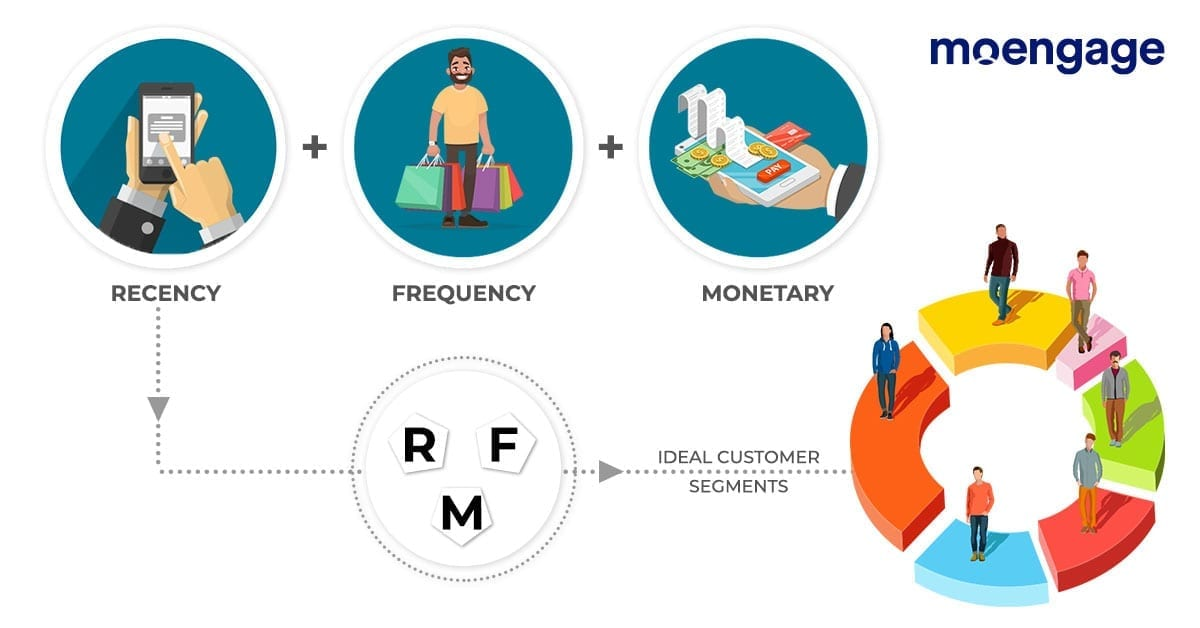

In [ ]:
new_datapoint = RFMScore.groupby('Loyal_customer')[['Recency', 'Frequency','Monetary','CustomerID']].agg({
    'Recency':'sum', 'Frequency':'sum', 'Monetary':'sum','CustomerID':'nunique'}).reset_index()

In [ ]:
new_datapoint = new_datapoint.rename(columns = {'CustomerID':"No_Of_Customer"} )
new_datapoint

,Loyal_customer,Recency,Frequency,Monetary,No_Of_Customer
0,Platinium,13340,297150,765731356.0,1308
1,Gold,42079,73994,160271639.0,1289
2,silver,78927,23588,52766014.1,940
3,Bronze,132879,8127,19300105.0,812


In [ ]:
new_datapoint['Percentage'] = round(new_datapoint['No_Of_Customer'] / new_datapoint.No_Of_Customer.sum()*100, 2)

In [ ]:
new_datapoint

,Loyal_customer,Recency,Frequency,Monetary,No_Of_Customer,Percentage
0,Platinium,13340,297150,765731356.0,1308,30.08
1,Gold,42079,73994,160271639.0,1289,29.64
2,silver,78927,23588,52766014.1,940,21.61
3,Bronze,132879,8127,19300105.0,812,18.67


In [ ]:
new_datapoint = new_datapoint.drop(['Recency', 'Frequency', 'Monetary'], axis=1)

In [ ]:
new_datapoint

,Loyal_customer,No_Of_Customer,Percentage
0,Platinium,1308,30.08
1,Gold,1289,29.64
2,silver,940,21.61
3,Bronze,812,18.67


In [ ]:
!pip install squarify

In [ ]:
import squarify

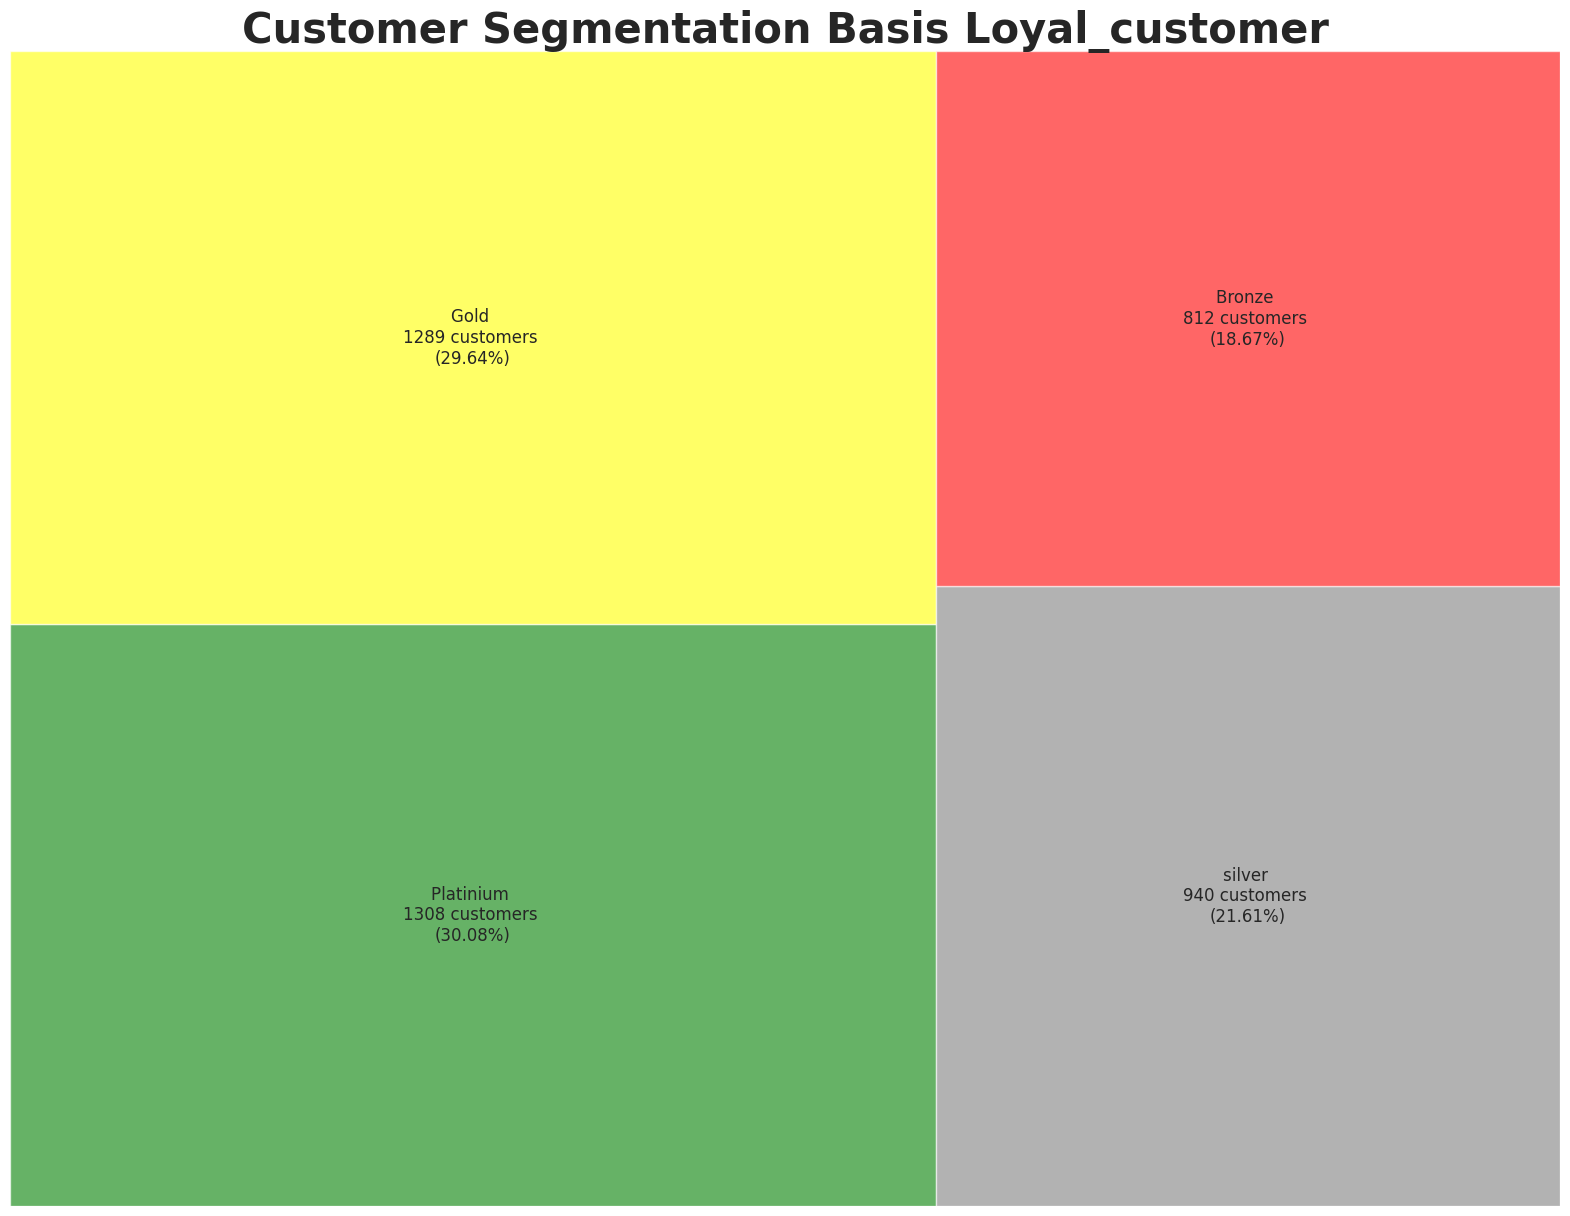

In [ ]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,15)
colors_dics = {'Platinum':'green', 'Gold':"yellow",'Silver':'gray','Bronze':'red'}

squarify.plot(sizes=new_datapoint['No_Of_Customer'],color=colors_dics.values(),
             label = ['{} \n{:.0f} customers \n({}%)'.format(*new_datapoint.iloc[i])
                      for i in range(0, len(new_datapoint))], alpha=0.6)
plt.title("Customer Segmentation Basis Loyal_customer", fontsize=30, fontweight='bold')
plt.axis("off")
plt.show()

# KMEANS CLUSTERING

## 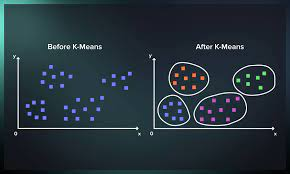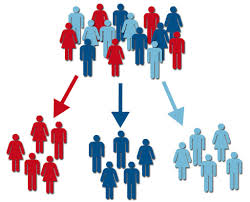

In [ ]:
RFMScore

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Loyal_customer
0,2.0,4,181,550416.0,1,1,1,3,Platinium
1,3.0,77,27,257404.0,4,3,1,8,Gold
2,4.0,20,72,176613.0,3,2,2,7,Gold
3,5.0,18,16,41976.0,2,4,3,9,silver
4,6.0,9,84,151822.0,1,2,2,5,Platinium
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4,10,silver
4345,4369.0,181,7,10774.0,4,4,4,12,Bronze
4346,4370.0,12,13,24962.0,2,4,4,10,silver
4347,4371.0,4,751,279720.0,1,1,1,3,Platinium


In [ ]:
RFMScore1=RFMScore.iloc[:,1:4]

In [ ]:
RFMScore1

,Recency,Frequency,Monetary
0,4,181,550416.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0
...,...,...,...
4344,17,10,20480.0
4345,181,7,10774.0
4346,12,13,24962.0
4347,4,751,279720.0


# Mandatory preprocessing:Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
RFMScore1_sc=sc.fit_transform(RFMScore1)
RFMScore1_sc

array([[-0.64079551,  0.38301434,  0.37509732],
       [ 0.17351282, -0.28447368,  0.0326216 ],
       [-0.46231697, -0.08942848, -0.06180783],
       ...,
       [-0.55155624, -0.34515441, -0.23905922],
       [-0.64079551,  2.85358691,  0.05870479],
       [-0.1165148 , -0.10676583,  0.0320933 ]])

In [ ]:
scaled_data=pd.DataFrame(RFMScore1_sc,index=RFMScore1.index,columns=RFMScore1.columns)

In [ ]:
scaled_data

,Recency,Frequency,Monetary
0,-0.640796,0.383014,0.375097
1,0.173513,-0.284474,0.032622
2,-0.462317,-0.089428,-0.061808
3,-0.484627,-0.332151,-0.219173
4,-0.585021,-0.037416,-0.090784
...,...,...,...
4344,-0.495782,-0.358157,-0.244298
4345,1.333623,-0.371160,-0.255642
4346,-0.551556,-0.345154,-0.239059
4347,-0.640796,2.853587,0.058705


# Building KMeans Clustering ALGORITHM

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]


for i in range(2,15):
    KM = KMeans(n_clusters=i, init='k-means++',max_iter=1000, random_state=1)
    KM.fit(scaled_data)
    wcss.append(KM.inertia_)

In [ ]:
wcss

[9014.850261247648,
 5556.252595830581,
 4360.031655505539,
 3346.87429512249,
 2481.0756115519907,
 1978.0159487281853,
 1708.4226746616323,
 1496.5260309486198,
 1302.0654193907108,
 1135.2984482971226,
 985.8855468498049,
 864.6200520264739,
 768.3196400397624]

In [ ]:
abc=[1,2,3,4,5,6,7,8,9,10,11,12,13]

In [ ]:
# ELBOW method

<Axes: >

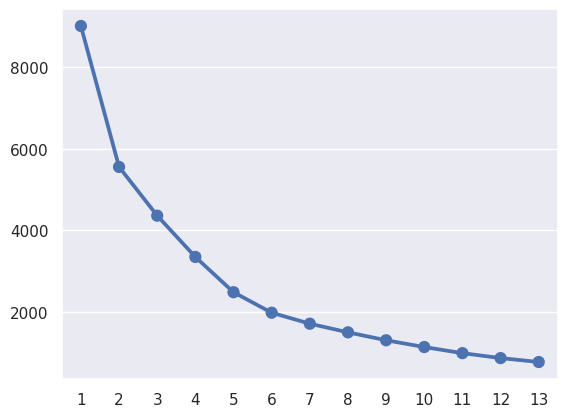

In [ ]:
# Elbow method
sns.pointplot(x=abc, y=wcss)


In [ ]:
KM = KMeans(n_clusters=8, init='k-means++',max_iter=1000, random_state=1)
y_kmeans = KM.fit_predict(scaled_data)
y_kmeans

array([0, 4, 4, ..., 4, 6, 4], dtype=int32)

In [ ]:
scaled_data["Cluster"]=KM.labels_

In [ ]:
scaled_data

,Recency,Frequency,Monetary,Cluster
0,-0.640796,0.383014,0.375097,0
1,0.173513,-0.284474,0.032622,4
2,-0.462317,-0.089428,-0.061808,4
3,-0.484627,-0.332151,-0.219173,4
4,-0.585021,-0.037416,-0.090784,4
...,...,...,...,...
4344,-0.495782,-0.358157,-0.244298,4
4345,1.333623,-0.371160,-0.255642,7
4346,-0.551556,-0.345154,-0.239059,4
4347,-0.640796,2.853587,0.058705,6


In [ ]:
scaled_data.to_csv("best_cluster")

In [ ]:
scaled_data['Cluster'].value_counts()

4    2643
0     700
7     500
1     353
6     135
5      13
3       4
2       1
Name: Cluster, dtype: int64

In [ ]:
RFMScore1['Cluster'] = KM.labels_

In [ ]:
RFMScore1

,Recency,Frequency,Monetary,Cluster
0,4,181,550416.0,0
1,77,27,257404.0,4
2,20,72,176613.0,4
3,18,16,41976.0,4
4,9,84,151822.0,4
...,...,...,...,...
4344,17,10,20480.0,4
4345,181,7,10774.0,7
4346,12,13,24962.0,4
4347,4,751,279720.0,6


Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly distinguished

In [ ]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_data, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8178035722967565


# **Conclusion**:

In this project, we conducted a comprehensive customer segmentation analysis using RFM (Recency, Frequency, Monetary) data. The project involved several key steps:

**# Data Preprocessing:**
We started by loading and cleaning the dataset, handling missing values, and formatting the date. We also dropped irrelevant columns and removed duplicate rows, resulting in a clean and structured dataset.

**# RFM Calculation:**
We calculated the Recency, Frequency, and Monetary values for each customer, which are fundamental metrics for understanding customer behavior. Recency measured how recently a customer made a purchase, Frequency captured how often they made purchases, and Monetary represented the total spending.

**# RFM Score and Segmentation:**
We assigned RFM scores to each customer by categorizing them into quartiles for Recency, Frequency, and Monetary metrics. This allowed us to classify customers into segments based on their behavior, such as Platinum, Gold, Silver, and Bronze.

**# Visualization:**
We visualized the customer segments using a treemap, providing an easy-to-understand representation of the distribution of customers across segments. This visualization highlighted the proportion of customers in each category.

**# K-Means Clustering:**
We performed K-Means clustering on the standardized RFM data to identify natural groupings of customers. Using the elbow method, we determined that 8 clusters were optimal. This resulted in the assignment of customers to specific clusters.

** Cluster Analysis:
We examined the characteristics of each cluster, including Recency, Frequency, and Monetary values. This allowed us to gain insights into the distinct behaviors and preferences of customers within each cluster.

**# Silhouette Score:**
To assess the quality of our clustering, we calculated the silhouette score, which indicated that the clusters were well-separated and cohesive, with a score of 0.818.

# **Key Findings**:

1. Customer segmentation based on RFM analysis and K-Means clustering revealed eight distinct customer segments.
2. The "Platinum" and "Gold" segments contained the most valuable and engaged customers, with high recency, frequency, and monetary values.
3. The "Silver" segment represented moderately engaged customers, while the "Bronze" segment consisted of less active customers.
4. The distribution of customers across segments was visualized using a treemap, providing a clear overview of segment proportions.




# **Customer Segementation**


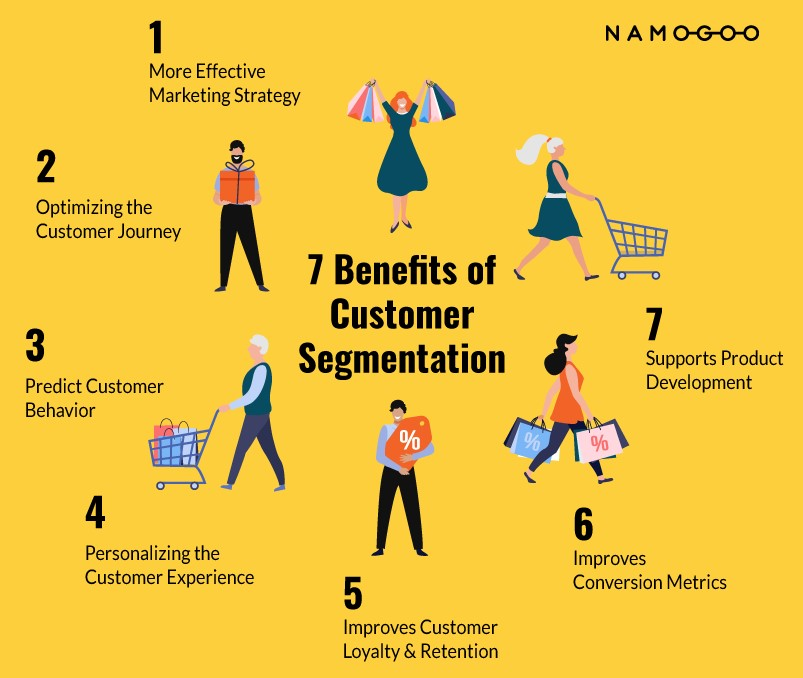



# **Results:**

**Customer Segmentation**:
Based on our analysis, we identified the following customer segments:

**High-Value Customers**: These customers exhibit high RFM scores, indicating recent, frequent, and high-value purchases. They are likely loyal and should be targeted with premium offers and personalized experiences.

**Loyal Customers**: While not as high in monetary value, these customers have made frequent purchases recently, indicating loyalty. Retention efforts should focus on maintaining their loyalty.

**Potential VIPs**: These customers have a high monetary value but haven't made recent purchases. Re-engagement campaigns and exclusive offers may bring them back.

**New Customers**: Customers in this segment have made recent purchases but haven't yet established a consistent buying pattern. Onboarding campaigns and incentives can help convert them into regular buyers.

**Churning Customers**: These customers have low scores in all RFM categories, indicating they may be at risk of churning. Targeted retention strategies should be implemented to prevent their departure.

# **Recommendations:**
Based on our findings, we propose the following recommendations:

**Personalized Marketing**: Tailor marketing campaigns and offers to each customer segment to maximize engagement and ROI.

**Retention Strategies:** Implement targeted retention strategies, such as loyalty programs and re-engagement campaigns, to prevent churning and maintain customer loyalty.

**Customer Experience Enhancement:** Improve the overall customer experience, including website navigation, customer support, and product quality, to appeal to high-value and loyal customers.

**Data-Driven Decision Making:** Continuously monitor customer behavior and adjust strategies based on real-time data to stay competitive and responsive to changing market dynamics.


The Customer Segmentation project using the RFM approach has provided valuable insights into our customer base. By understanding customer behavior and preferences at a granular level, we can tailor our marketing efforts to maximize customer satisfaction and revenue. This project lays the foundation for data-driven decision-making and ongoing optimization of customer engagement strategies.

The success of this project demonstrates the power of machine learning and data analysis in driving business growth and customer satisfaction. We look forward to implementing these recommendations and reaping the benefits of improved customer segmentation.